# Student Performance Indicator

# Life cycle of Machine learning Project
 1. Understanding the Problem Statement
 2. Data Collection
 3. Data Checks to perform
 4. Exploratory data analysis
 5. Data Pre-Processing
 6. Model Training
 7. Choose best model

1. Problem Statement
    - This project understands how the student's performance (test  scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2. Import Data and required packages 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Dataset Information

- gender: sex of student-> (male/female)
- race/ethnicity: ethnicity of students-> (Group A,B,C,D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- maths score 
- reading score
- writing score

In [7]:
# Check missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

In [8]:
# Check Duplicate

df.duplicated().sum()

0

#### There are no duplicates values in the data set

In [9]:
# Check data types
# check for null and Dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Checking the number of unique values of each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
# check statistic of dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



##### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [12]:
# Exploring Data

df.head(15)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [13]:
print("categories in 'gender' varible:  ", end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' varible:  ", end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' varible:  ", end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' varible:  ", end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' varible:  ", end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' varible:   ['female' 'male']
categories in 'race_ethnicity' varible:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' varible:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' varible:   ['standard' 'free/reduced']
categories in 'test_preparation_course' varible:   ['none' 'completed']


In [14]:
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns

print("we have {} numeric features: {}".format(len(numeric_features), numeric_features))
print("we have {} categorical features: {}".format(len(categorical_features), categorical_features))

we have 3 numeric features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
# Adding columns for "Total Score" and "Average"

df['Total score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average'] = df['Total score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [18]:
reading_full = df[df['reading_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()
maths_full = df[df['math_score']==100]['Average'].count()

print(f"Number of student with full marks in maths: {maths_full}")
print(f"Number of student with full marks in writing: {writing_full}")
print(f"Number of student with full marks in reading: {reading_full}")

Number of student with full marks in maths: 7
Number of student with full marks in writing: 14
Number of student with full marks in reading: 17


In [19]:
reading_less = df[df['reading_score']<=20]['Average'].count()
maths_less = df[df['math_score']<=20]['Average'].count()
writing_less = df[df['writing_score']<=20]['Average'].count()

print(f"Number of student with less than 20 marks in maths: {maths_less}")
print(f"Number of student with less than 20 marks in writing: {writing_less}")
print(f"Number of student with less than 20 marks in reading: {reading_less}")

Number of student with less than 20 marks in maths: 4
Number of student with less than 20 marks in writing: 3
Number of student with less than 20 marks in reading: 1


#### Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## Exploring Data ( Visualization )

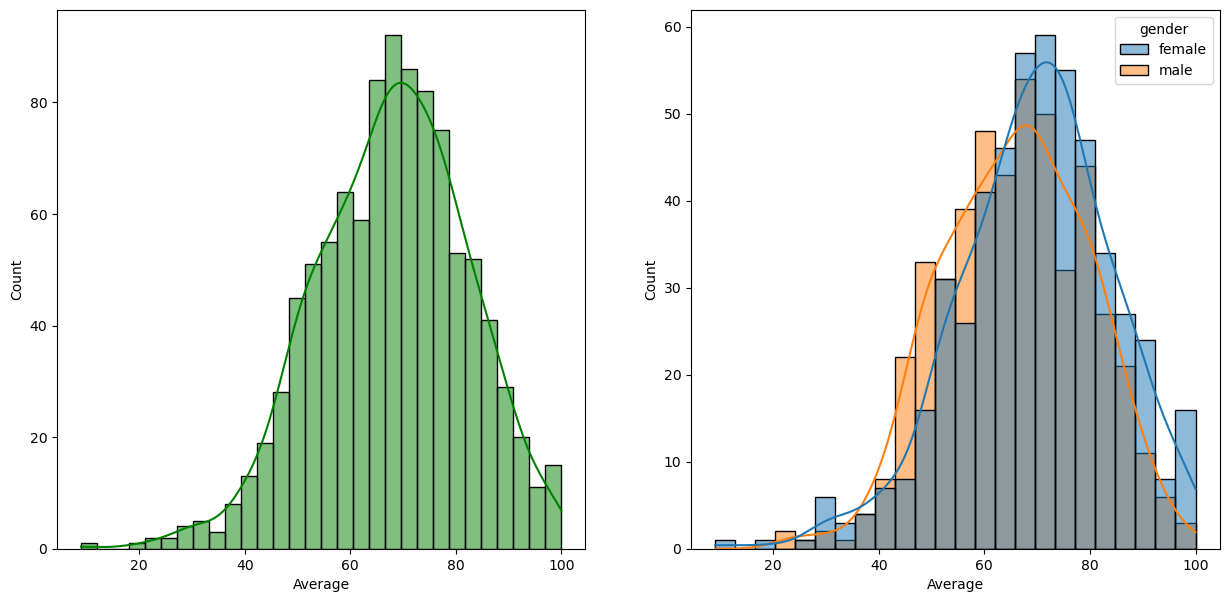

In [25]:
# Histogram & KDE

fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True,hue='gender')
plt.show()

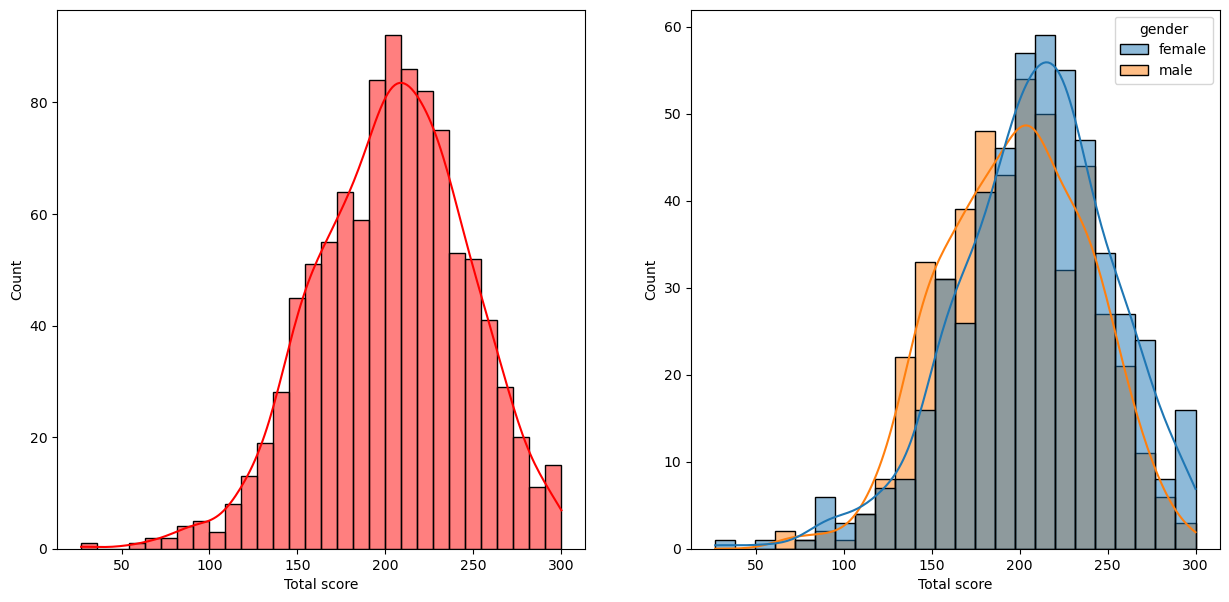

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total score', bins=30, kde=True, color='r')
plt.subplot(122)
sns.histplot(data=df, x='Total score', kde=True,hue='gender')
plt.show()

#### Insights
- Female students tend to perform well then male students.

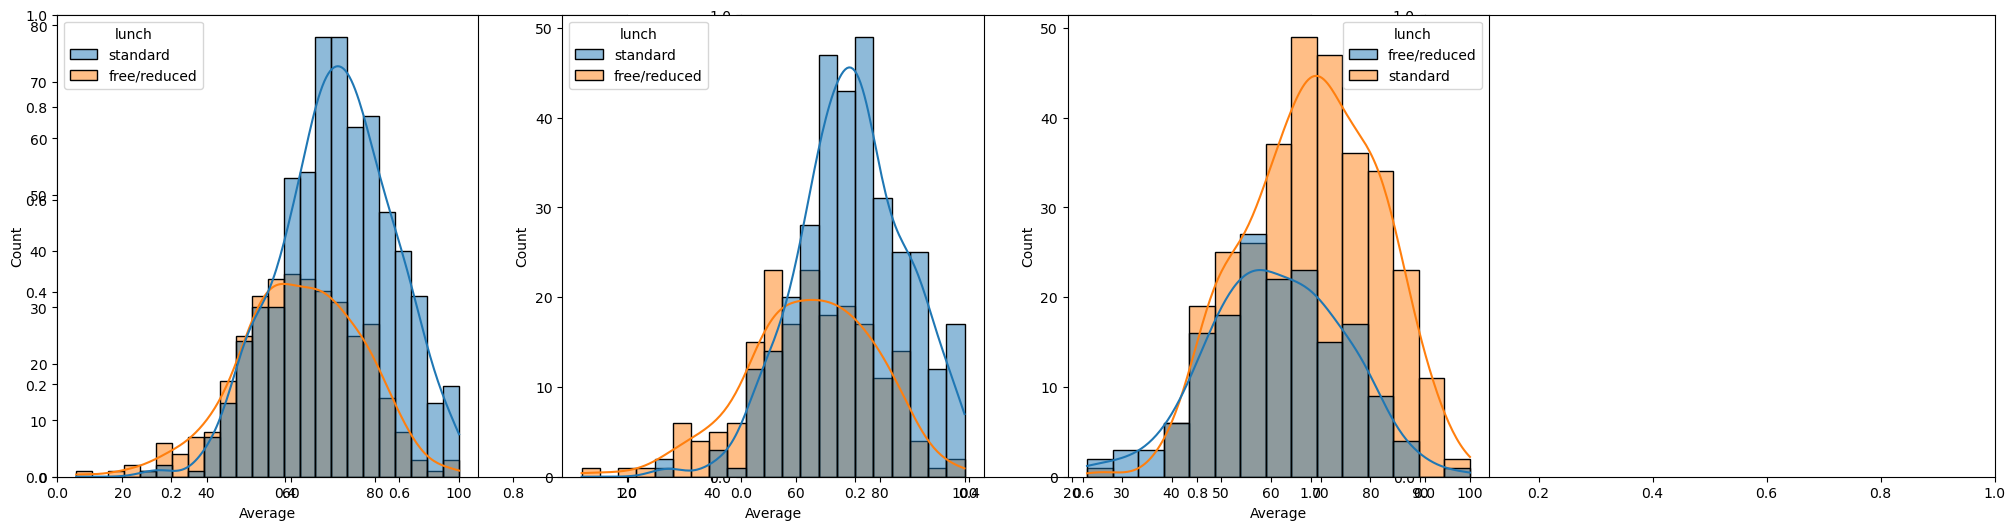

In [63]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average',kde=True,hue='lunch')
plt.show()

##### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female

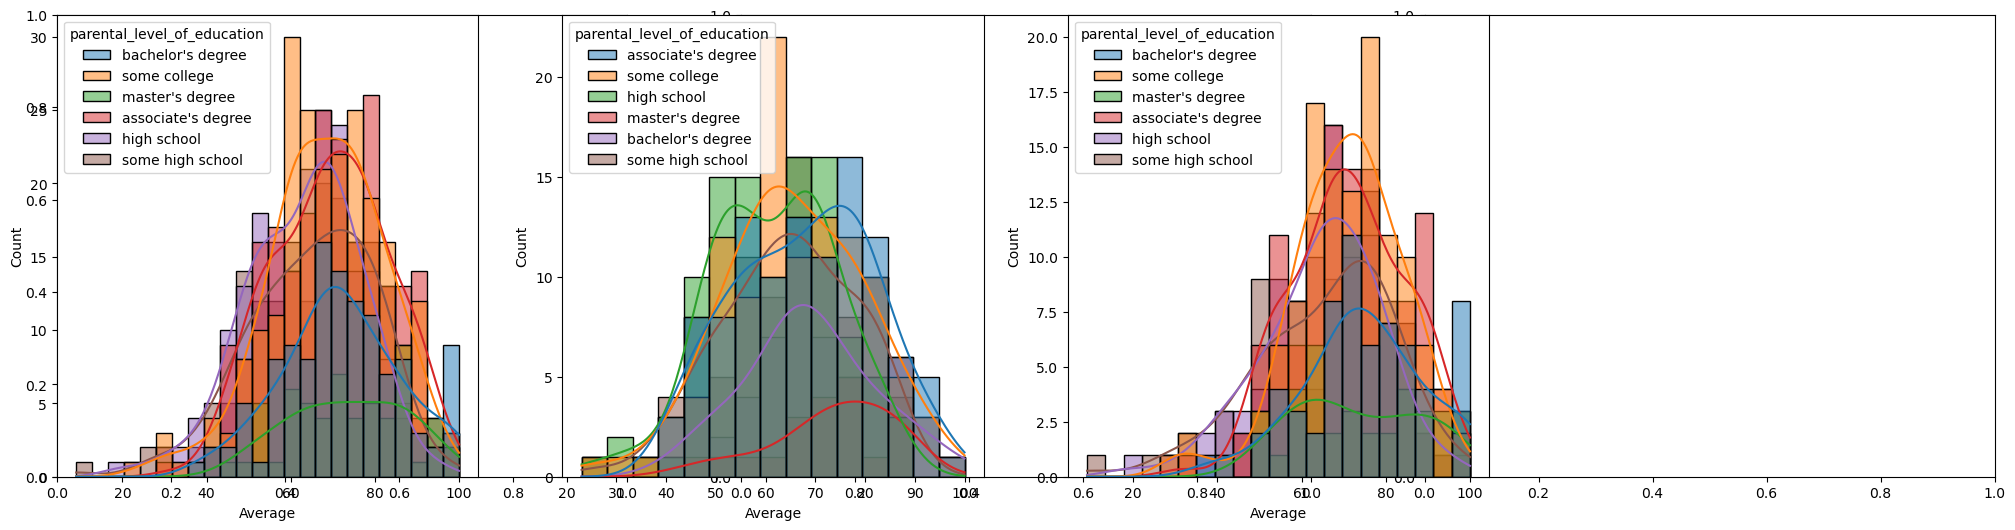

In [67]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()


###### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students

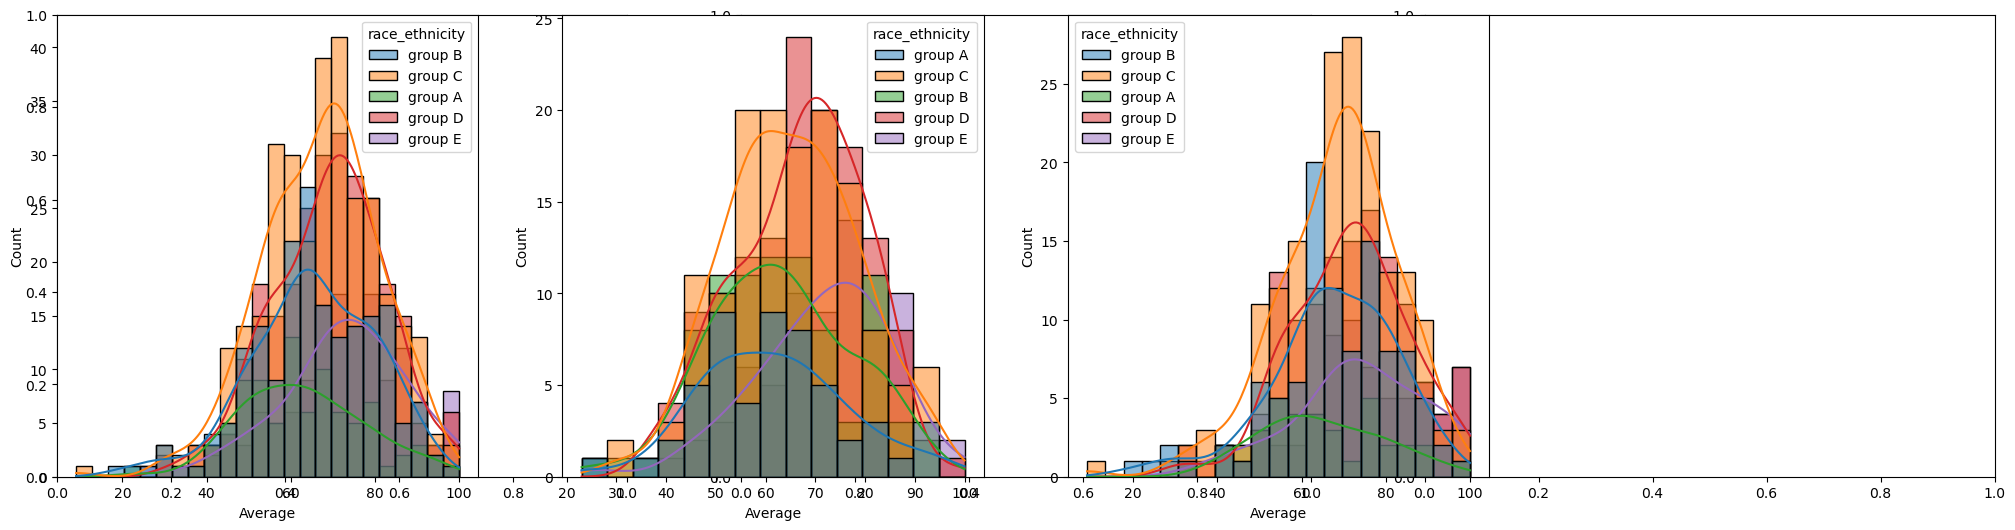

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.show()



### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or femal

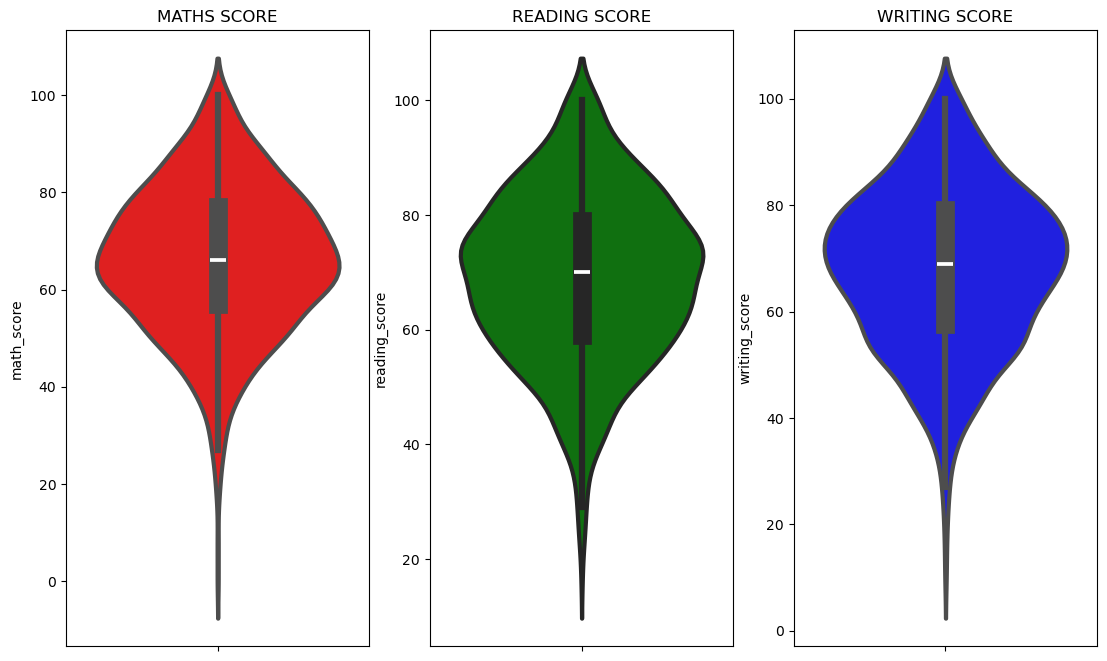

In [77]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATHS SCORE")
sns.violinplot(y="math_score", data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title("READING SCORE")
sns.violinplot(y="reading_score", data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title("WRITING SCORE")
sns.violinplot(y="writing_score", data=df, color='blue', linewidth=3)
plt.show()

##### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

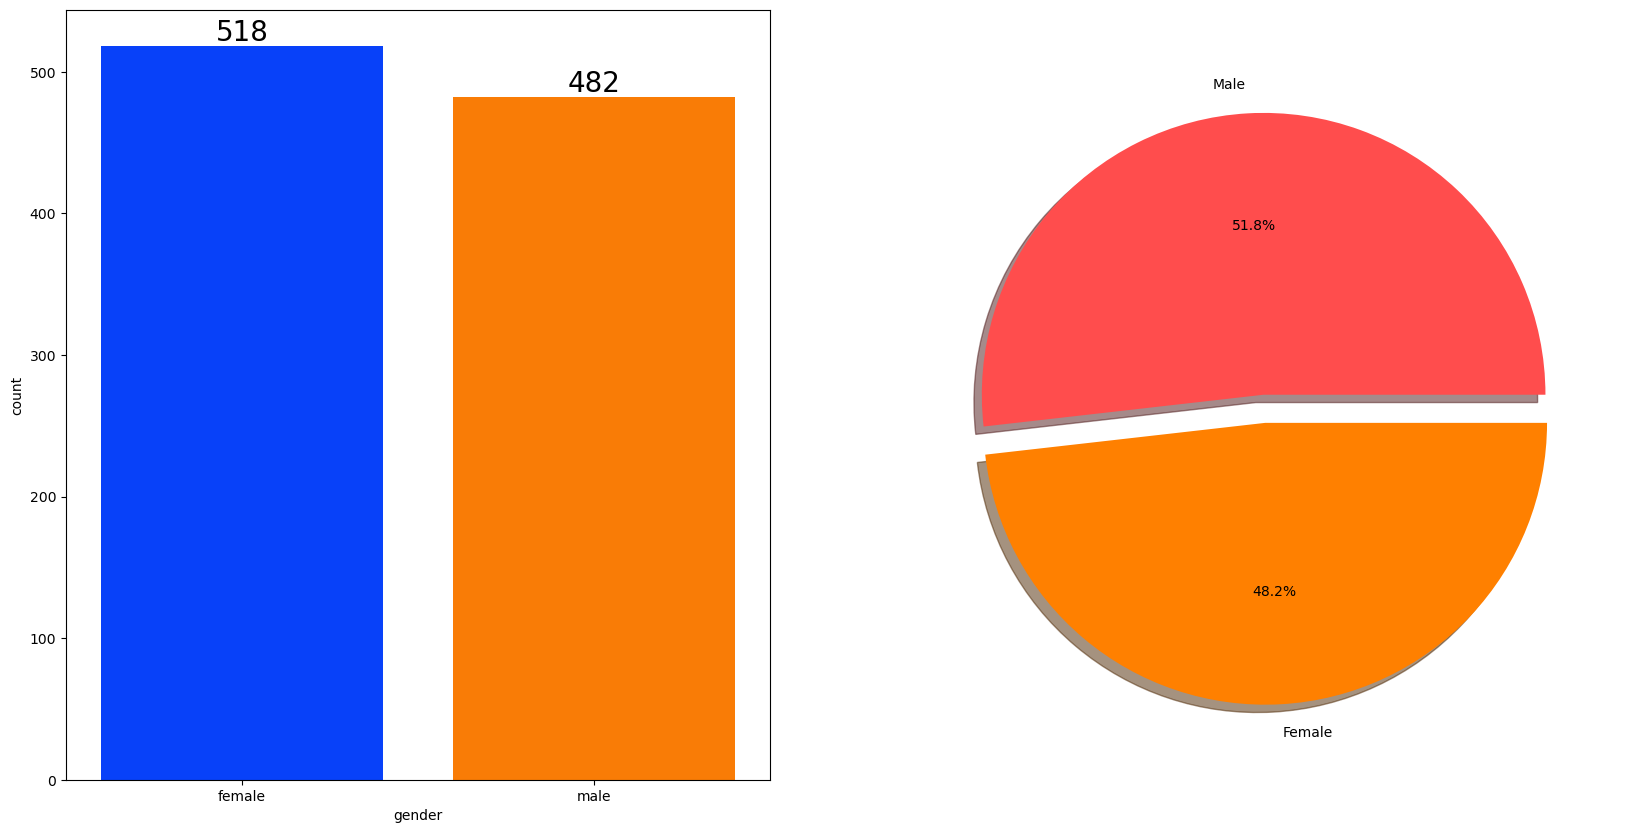

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

##### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [81]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,Total score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


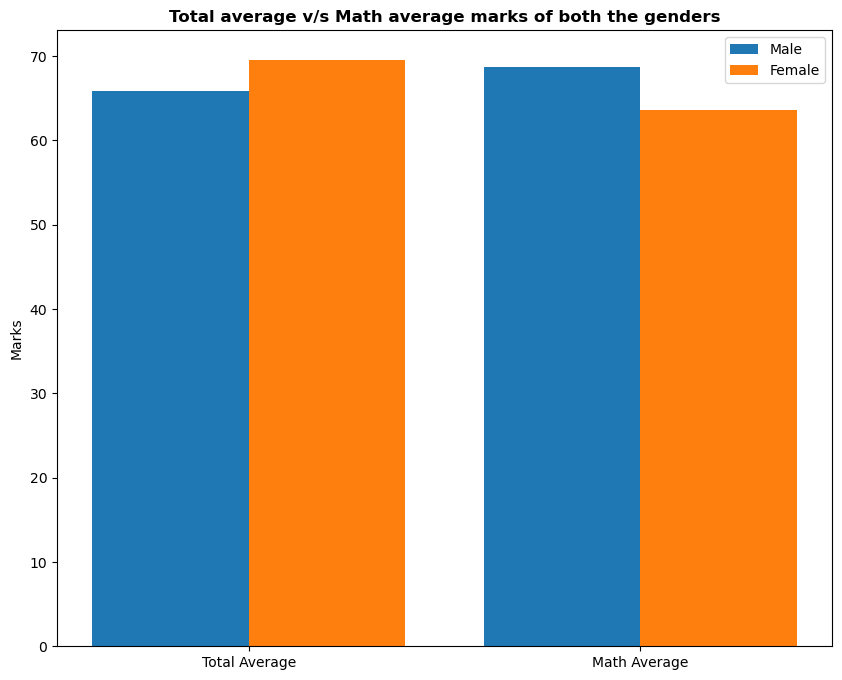

In [87]:
plt.figure(figsize=(10,8))

x = ['Total Average', 'Math Average']

female_score = [gender_group['Average'][0], gender_group['math_score'][0]]
male_score = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label = 'Female')

plt.xticks(X_axis,x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


#### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.